# Exploratory Data Analysis

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> How can we predict which individuals are most likely to have or use a bank account?

### b) Defining the Metric for Success

> We will perform univariate, bivariate and multivariate analysis for this dataset
 1. For univariate we will plot pie charts and bar graphs to understand more about the data 
 2. For Bivariate analysis we will plot scatter plots and histograms to understand the relationship between variables
 3. Last but not least, we will perform a multivariate analysis by using factor, Discriminant and Principal Component analysis

### c) Understanding the context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.

### d) Recording the Experimental Design

As stated above we will do a full analysis of the data and we will choose the most accurate form of multivariate analysis

### e) Data Relevance

The data provided is suitable to give the full analysis and output that we need. It is therefore very relevant for this study.

In [134]:
Variables = pd.read_csv('http://bit.ly/VariableDefinitions')
Variables

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


## 2. Reading the Data

In [0]:
# Loading the Libraries i.e. matplotlib
# ---
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [0]:
# Loading the Data from the source i.e. csv
# --- 
# Dataset Files:
# Variable Definitions: http://bit.ly/VariableDefinitions 
# Dataset: http://bit.ly/FinancialDataset
# ---
#

data_fin = pd.read_csv('http://bit.ly/FinancialDataset')


## 3. Checking the Data

In [137]:
# Determining the no. of records in our dataset
#
data_fin.shape

(23524, 13)

In [138]:
# Previewing the top of our dataset
#
data_fin.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [139]:
# Previewing the bottom of our dataset
# 
data_fin.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [140]:
# Checking whether each column has an appropriate datatype
#
data_fin.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## 4. Tidying the Dataset

In [141]:
# checking for duplicates

data_fin.duplicated().any()

False

In [142]:
# Identifying the Missing Data
#
data_fin.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [0]:
# Dealing with the missing values

fin_data = data_fin.dropna()

In [144]:
# confirming that there are no null
fin_data.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [0]:
# renaming columns
finance = fin_data.rename(columns={'level of education':'level_of_education','The relathip with head':'Relationship_with_the_head', 'Respondent Age':'Respondent_Age' })


In [0]:
# dropping the uniqueid column


finance = finance.drop(['uniqueid'], axis = 1)

In [147]:
# checking the columns present

finance.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'Relationship_with_the_head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

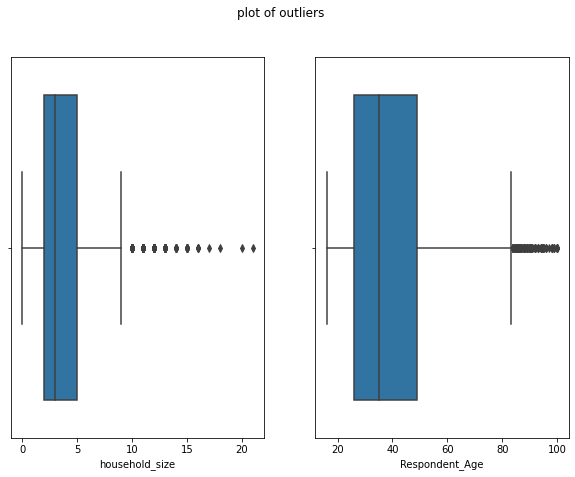

In [148]:
# Checking for Outliers
#
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,7))
fig.suptitle('plot of outliers')
sns.boxplot(finance['household_size'],ax=ax1)
sns.boxplot(finance['Respondent_Age'], ax=ax2)
plt.show()

In [149]:
# Checking for Anomalies
#
q1 = finance.quantile(.25)
q3 = finance.quantile(.75)

iqr =q3 -q1
print(iqr)

year               2.0
household_size     3.0
Respondent_Age    23.0
dtype: float64


## 6. Exploratory Analysis

### 1. Univariate Analysis

#### Central tendencies

In [150]:
# with the description below we can see the summary analysis of the integer columns
# This table shows the measures of central tendency (mode, median, mean, standard deviation, minimum ^ maximumvalue, ) for a set of data.

finance.describe()


,year,household_size,Respondent_Age
count,23343.000000,23343.000000,23343.000000
mean,2016.980594,3.688643,38.805509
std,0.901740,2.281184,16.519803
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


In [151]:
# Mode 
print('households size mode',finance['household_size'].mode())
print('respondent age mode',finance['Respondent_Age'].mode())

households size mode 0    2.0
dtype: float64
respondent age mode 0    30.0
dtype: float64


In [152]:
# Median
print('households size median',finance['household_size'].median())
print('respondent age median',finance['Respondent_Age'].median())

households size median 3.0
respondent age median 35.0


#### Pie Charts

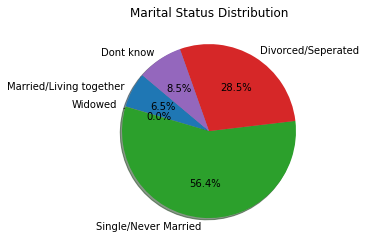

In [153]:
# Ploting the univariate summaries and recording our observations
#
size = finance_data.groupby(['marital_status'])['household_size'].sum()
status = ['Married/Living together', 'Widowed', 'Single/Never Married', 
          'Divorced/Seperated', 'Dont know']
plt.pie(size, labels = status, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('Marital Status Distribution')
plt.show()

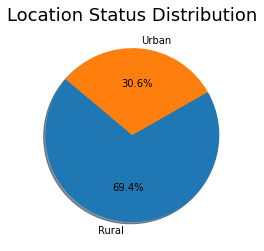

In [154]:
size = finance.groupby(['Type of Location'])['household_size'].sum()
status = ['Rural',  'Urban']
plt.pie(size, labels = status, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('Location Status Distribution', size= 18)
plt.show()

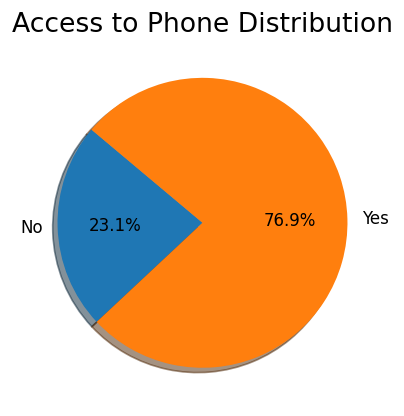

In [155]:
size = finance.groupby(['Cell Phone Access'])['household_size'].sum()
status = ['No',  'Yes']
plt.figure(dpi = 120)
plt.pie(size, labels = status, autopct = '%1.1f%%', shadow = True, startangle = 140)
plt.title('Access to Phone Distribution', size=16)
plt.show()

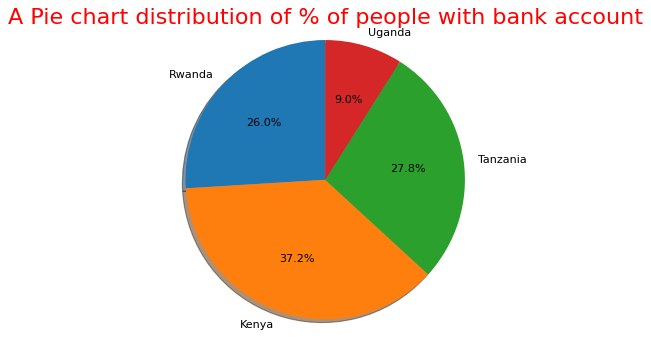

In [156]:
bank =finance.groupby(['country'])['Has a Bank account'].count()
label = ['Rwanda','Kenya','Tanzania','Uganda']
label

plt.figure(figsize=(5,5),dpi=80)
plt.pie(bank, labels = label, autopct= '%1.1f%%', shadow= True,  startangle= 90)
plt.axis('equal')
plt.title('A Pie chart distribution of % of people with bank account', color='red', size = 20)
plt.show()

#### Bar Graphs

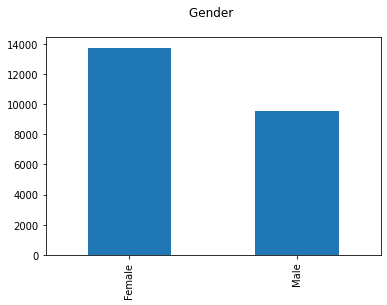

In [157]:
finance['gender_of_respondent'].value_counts().plot.bar(title='Gender \n')

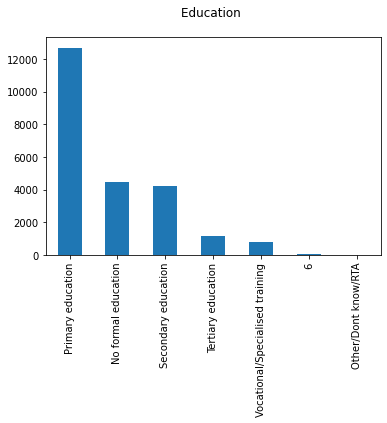

In [158]:
finance['Level of Educuation'].value_counts().plot.bar(title='Education \n')

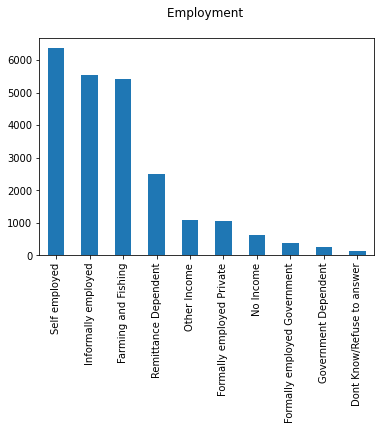

In [159]:
finance['Type of Job'].value_counts().plot.bar(title='Employment \n')

#### Histograms

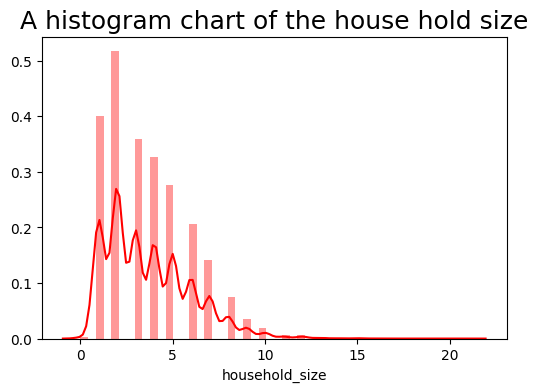

In [160]:
plt.figure(dpi = 100)
sns.distplot(finance['household_size'], color= 'red')
plt.title('A histogram chart of the house hold size', size = 18)
plt.show()

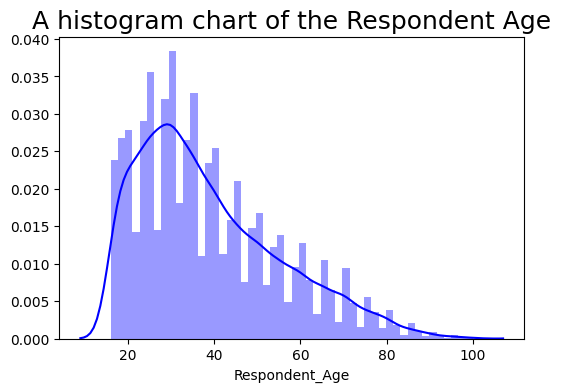

In [161]:
plt.figure(dpi = 100)
sns.distplot(finance['Respondent_Age'], color= 'blue')
plt.title('A histogram chart of the Respondent Age', size=18)
plt.show()

### 2. Bivariate Analysis

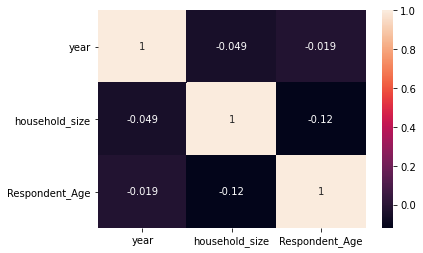

In [162]:
# Ploting the bivariate summaries and recording our observations
#Heatmap
sns.heatmap(finance.corr(),annot=True)
plt.show()

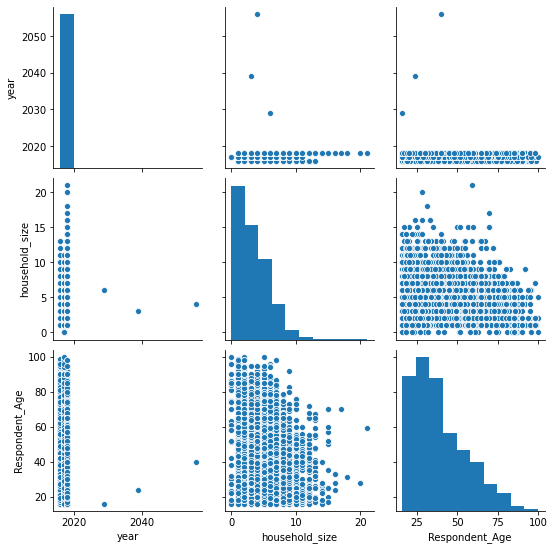

In [163]:
# Ploting the bivariate summaries and recording our observations
# Pairplot
#
sns.pairplot(finance)
plt.show()

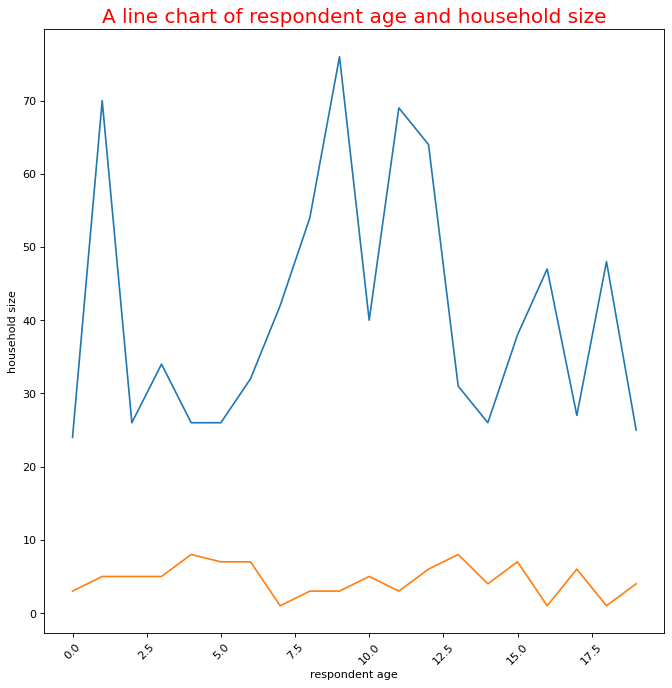

In [164]:
# line chart
# limit the number of rows to have clear data

fin=finance.iloc[0:20,-7:-5]
plt.figure(figsize = (10,10), dpi = 80)
plt.plot(fin[['Respondent_Age', 'household_size']])
plt.xticks(rotation = 45)
plt.title('A line chart of respondent age and household size', color = 'red', size=18)
plt.xlabel('respondent age')
plt.ylabel('household size')
plt.show()

### 3. Multivariate Analysis

#### Mapping the columns

In [0]:
# This will help us in perfoming a successful multivariate analysis by changing the datatypes to integer

country ={"Kenya": 0,"Rwanda": 1, "Tanzania": 2, "Uganda": 3}
location = {"Urban":1, "Rural":0}
cellphone = {"Yes":1, "No":0}
gender = {"Male":1, "Female":0}
bank = { "Yes": 1, "No":0}
head={ "Spouse":2, "Head of Household":1, "Other relative":0, "Child":3,"Parent":4,"Other non-relatives":5}
education={"No formal education":0, "Primary education":1, "Secondary education":2, "Vocational/Specialised training":3,
               "Tertiary education":4, "Other/Dont know/RTA":5, "6":6}

job={"Self employed":0, "Government Dependent":1, "Formally employed Private":2, "Informally employed":3, "Formally employed Government":4,
         "Farming and Fishing":5, "Remittance Dependent":6, "Other Income":7, "Dont Know/Refuse to answer":8,"No Income":9}

finance['country']=finance['country'].map(country)
finance['Type of Location'] = finance['Type of Location'].map(location)
finance['Cell Phone Access'] = finance['Cell Phone Access'].map(cellphone)
finance['gender_of_respondent'] = finance['gender_of_respondent'].map(gender)
finance['Has a Bank account']=finance['Has a Bank account'].map(bank)
finance['Relationship_with_the_head']=finance['Relationship_with_the_head'].map(head)
finance['Level of Educuation']=finance['Level of Educuation'].map(education)
finance['Type of Job']=finance['Type of Job'].map(job)

In [166]:
finance.head()

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,Relationship_with_the_head,marital_status,Level of Educuation,Type of Job
0,0,2018,1,0,1,3.0,24.0,0,2,Married/Living together,2,0
1,0,2018,0,0,0,5.0,70.0,0,1,Widowed,0,1
2,0,2018,1,1,1,5.0,26.0,1,0,Single/Never Married,3,0
3,0,2018,0,0,1,5.0,34.0,0,1,Married/Living together,1,2
4,0,2018,0,1,0,8.0,26.0,1,3,Single/Never Married,1,3


#### Principal Component Analysis(PCA)

In [0]:
# Step 1: Preprocessing
# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# The script below stores the feature sets into the X variable 
# and the series of corresponding labels in to the y variable.

X = finance.drop(columns = ['year','Has a Bank account','marital_status'])
y = finance['Has a Bank account']


In [0]:
# Step 2: Splitting the dataset into the Training set and Test set
# The next preprocessing step is to divide data into training and test sets. 
#
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [0]:
# Step 3: Normalization
# As mentioned earlier, PCA performs best with a normalized feature set. 
# We will perform standard scalar normalization to normalize our feature set. 
# To do this, we execute the following code:
# 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Step 4: Applying PCA
# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 
# The transform method returns the specified number of principal components.
# Let's take a look at the following code. In the code above, we create a PCA object named pca. 
# We did not specify the number of components in the constructor. 
# Hence, all four of the features in the feature set will be returned for both the training and test sets.
# 
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [171]:
# Step 5: Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# We execute the following line of code to find the "explained variance ratio".
# 
explained_variance = pca.explained_variance_ratio_

# The explained_variance variable is now a float type array which contains variance ratios for each principal component. 
# The values for the explained_variance variable looks like what is shown in the output. 
# It can be seen that first principal component is responsible for 72.22% variance. 
# Similarly, the second principal component causes 23.9% variance in the dataset. 
# Collectively we can say that (72.22 + 23.9) 96.21% percent of the classification information contained 
# in the feature set is captured by the first two principal components.
explained_variance


array([0.19285463, 0.17260341, 0.15190829, 0.10603969, 0.09361169,
       0.08616121, 0.07050123, 0.06771749, 0.05860237])

In [0]:
# Step 6: Using 1 Principal Component
# Let's first try to use 1 principal component to train our algorithm. To do so, execute the following code:
# 
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [0]:
# training data
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, y_train)

# predicting the Test set results

y_pred = classifier.predict(X_test)

In [175]:
# Step 7: Performance Evaluation
# 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))

# Noting that from the output that with only one feature, 
# the random forest algorithm is able to correctly predict 28 out of 30 instances, 
# resulting in 93.33% accuracy.

[[4008    0]
 [ 661    0]]
Accuracy 0.8584279288926965


#### Factor Analysis

In [178]:
finance.head(2)

,country,year,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent_Age,gender_of_respondent,Relationship_with_the_head,marital_status,Level of Educuation,Type of Job
0,0,2018,1,0,1,3.0,24.0,0,2,Married/Living together,2,0
1,0,2018,0,0,0,5.0,70.0,0,1,Widowed,0,1


In [0]:
# dropping unnecessary columns
finance.drop(columns = ['year','marital_status'])

In [195]:
#installing factor analyzer
pip install factor_analyzer==0.2.3

In [198]:
# chi_square

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(finance)
chi_square_value,p_value
# the test was significant because the p-value is 0 which tells us that the correlation matrix is not an identy matrix

(22795.491075448026, 0.0)

In [0]:
# choosing the number of factors
# here we can only see 3-factor analyzer are greater than 1 which means we only need to consider the three factors
from factor_analyzer import  FactorAnalyzer
fa = FactorAnalyzer()
fa.analyze(finance, 10, rotation=None)

ev, v = fa.get_eigenvalues()

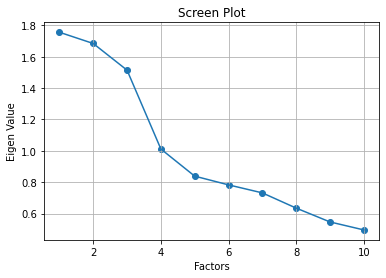

In [203]:
# the scree plot that drows a straight line for easch factor and its eigen values.

plt.scatter(range(1,finance.shape[1]+1),ev)
plt.plot(range(1,finance.shape[1]+1),ev)
plt.title('Screen Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()
plt.show()

In [206]:
# Performing Factor Analysis for 3
fa = FactorAnalyzer()
fa.analyze(finance,3, rotation='varimax')
fa.loadings

,Factor1,Factor2,Factor3
country,0.101375,-0.231368,-0.392547
Has a Bank account,-0.055407,0.554153,-0.032786
Type of Location,0.070342,0.075983,-0.542880
Cell Phone Access,0.032361,0.396697,0.153973
household_size,0.190368,0.000833,0.471991
Respondent_Age,-0.579823,-0.132072,0.019410
gender_of_respondent,-0.157734,0.239318,-0.045891
Relationship_with_the_head,0.721346,-0.162713,0.128067
Level of Educuation,0.330560,0.647027,-0.129074
Type of Job,0.071212,-0.034359,0.419508


In [207]:
# Pperforming factor analysis for 2
fa = FactorAnalyzer()
fa.analyze(finance, 2, rotation="varimax")
fa.loadings

,Factor1,Factor2
country,-0.091971,-0.233475
Has a Bank account,0.414633,-0.109842
Type of Location,0.145900,-0.415267
Cell Phone Access,0.316212,0.103605
household_size,0.021188,0.544516
Respondent_Age,-0.321574,-0.229196
gender_of_respondent,0.137439,-0.136525
Relationship_with_the_head,0.118093,0.354295
Level of Educuation,0.840373,-0.020008
Type of Job,-0.041866,0.406223


In [208]:
# Getting variance of each factors
fa.get_factor_variance()

,Factor1,Factor2
SS Loadings,1.146331,0.908366
Proportion Var,0.114633,0.090837
Cumulative Var,0.114633,0.205470


#### Discriminant Analysis

In [0]:
# divide our data into two again
X_l = finance.drop(columns = ['year','Has a Bank account','marital_status'])
y_l = finance['Has a Bank account']

In [0]:
# divide the data into training and and test sets
from sklearn.model_selection import train_test_split
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(X_l, y_l, test_size=0.2, random_state=0)

In [0]:
# normalization of data using the standard scaler
#
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_l_train = sc.fit_transform(X_l_train)
X_l_test = sc.transform(X_l_test)

In [0]:
#performing Linear Discrimin antAnalysis
#we are going to use only one component
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X_l_train = lda.fit_transform(X_l_train, y_l_train)
X_l_test = lda.transform(X_l_test)

In [0]:
#training and making predictions
#we are going to use the RandomForestClassifier algorithm
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_l_train, y_l_train)
y_l_pred = classifier.predict(X_l_test)

In [185]:
#perfoming an evaluation using a confusion matrix
#we are getting 85% accuaracy.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_l_test, y_l_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_l_test, y_l_pred)))

[[3862  146]
 [ 454  207]]
Accuracy0.8714928250160634


## 7. Implementing the Solution

In [0]:
# Implementing the Solution
# Discriminant analysis was more accurate than PCA
# The solutions were well perfomed


## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



> a). Did we have the right data? YES

> b). Do we need other data to answer our question? NO

> c). Did we have the right question? YES